# Signals and Systems CA1

Question 2: Step and impulse responses for systems

# 2.1

We calculate the impulse and step responses to the systems and then calculate it by numpy and plot them:

$$A: y[n] = \frac{1}{2}(x[n] + x[n-1])$$

Impulse response:
$$h[n] = \frac{1}{2}(\delta[n] + \delta[n-1]) \Rightarrow h[1] = \frac{1}{2}(0 + 1) = \frac{1}{2}, h[0] = \frac{1}{2}(1 + 0) = \frac{1}{2}, \forall n \neq 0,1: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow s[0] = \frac{1}{2}, s[1] = 1, \forall n < 0: s[n] = 0, \forall n > 1: s[n] = 1$$

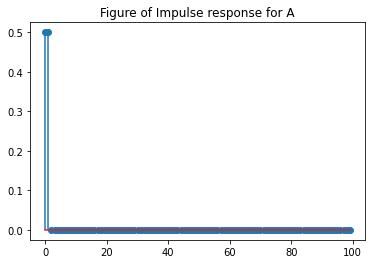

In [13]:
import numpy as np
from matplotlib import pyplot as plt

title = "Figure of {} response for {}"
N = 100
mu = [5, 15, 20]

def draw(response, name,x_, y_):
    plt.stem(x_, y_, use_line_collection=True)
    plt.title(title.format(response, name))
    plt.show()

def impulse(n):
    return np.piecewise(n, [n != 0, n == 0], [0, 1])
x_samples = np.arange(0, N, 1)

systems = list()

# System A
systems.append(lambda n, x: (x(n)+x(n-1))/2)

y_samples = systems[0](x_samples, impulse)
draw("Impulse", "A", x_samples, y_samples)

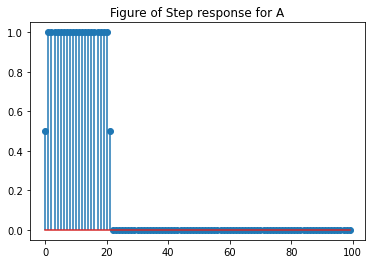

In [14]:
# We use this function for step response
def shift(system, n, k, x):
    return [system(n-i, x) for i in range(k+1)]

y_samples = np.sum(shift(systems[0], x_samples, mu[2], impulse), axis=0)
draw("Step", "A", x_samples, y_samples)

$$B: y[n] = x[n+1] - x[n]$$

Impulse response:
$$h[n] = \delta[n+1] - \delta[n] \Rightarrow h[-1] = 1 - 0 = 1, h[0] = 0 - 1 = -1, \forall n \neq -1,0: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow s[-1] = 1, s[0] = -1 + 1 = 0 \Rightarrow \forall n \neq -1: s[n] = 0$$

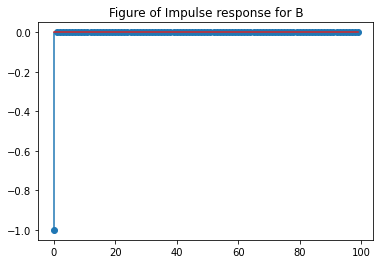

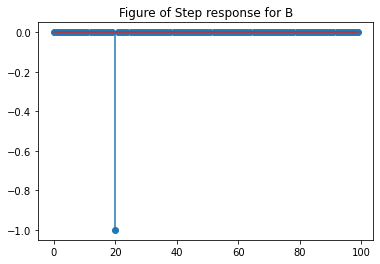

In [15]:
# System B
systems.append(lambda n, x: x(n+1) - x(n))

y_samples = systems[1](x_samples, impulse)
draw("Impulse", "B", x_samples, y_samples)

y_samples = np.sum(shift(systems[1], x_samples, mu[2], impulse), axis=0)
draw("Step", "B", x_samples, y_samples)


$$C: y[n] = x[n+1] - 2x[n] + x[n-1]$$

Impulse response:
$$h[n] = \delta[n+1] - 2\delta[n] + \delta[n-1]\Rightarrow h[-1] = 1 - 0 + 0= 1, h[0] = 0 - 2 + 0 = -2, h[1] = 0 - 0 + 1 = 1\forall n \neq -1,0,1: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow s[-1] = 1, s[0] = -2 + 1 = -1, s[1] = 1 - 1 = 0 \Rightarrow \forall n \neq -1, 0: s[n] = 0$$

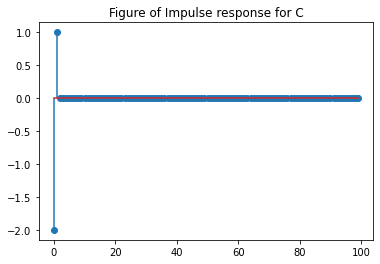

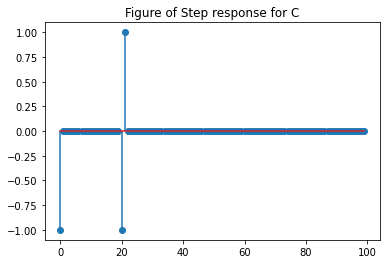

In [16]:
# System C
systems.append(lambda n, x: x(n+1) - 2*x(n) + x(n-1))

y_samples = systems[2](x_samples, impulse)
draw("Impulse", "C", x_samples, y_samples)

y_samples = np.sum(shift(systems[2], x_samples, mu[2], impulse), axis=0)
draw("Step", "C", x_samples, y_samples)



$$C: y[n] = \Sigma_{m=0}^{19} cos(\frac{\pi m}{10})x[n-m]$$

Impulse response:
$$h[n] = \Sigma_{m=0}^{19} cos(\frac{\pi m}{10})\delta[n-m]\Rightarrow \forall n: 0 \leq n \leq 19: h[n] = cos(\frac{\pi n}{10}), O.W: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow$$

$$\forall n < 0: s[n] = 0, \forall n: 0 \leq n \leq 19: s[n] = \Sigma_{m=0}^{n} cos(\frac{\pi m}{10}), \forall n > 19: s[n] = \Sigma_{m=0}^{19} cos(\frac{\pi m}{10})$$

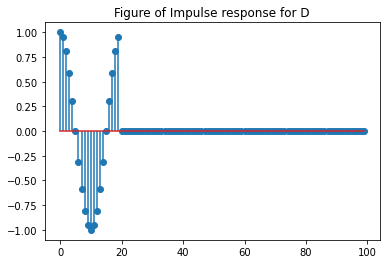

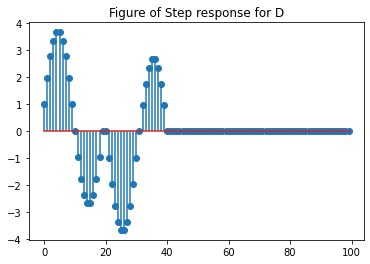

In [17]:
# System D
def system_d(_n, _x):
    new_x_samples = np.arange(0, 20, 1).reshape((1, 20))
    x_shifts = shift((lambda n, x: x(n)), _n, 19, impulse)
    cos_shifts = np.cos(np.pi/10 * new_x_samples)
    y = np.dot(cos_shifts, x_shifts)
    return y.reshape(-1)

systems.append(system_d)
y_samples = systems[3](x_samples, impulse)
draw("Impulse", "D", x_samples, y_samples)

y_samples = np.sum(shift(systems[3], x_samples, mu[2], impulse), axis=0)
draw("Step", "D", x_samples, y_samples)

# 2.2
We change mu to see the changes for the step responses:

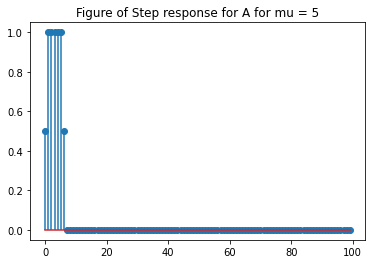

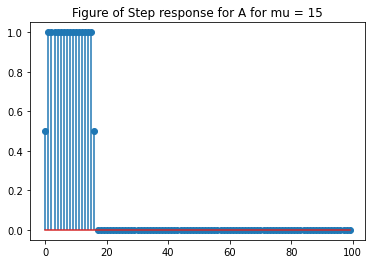

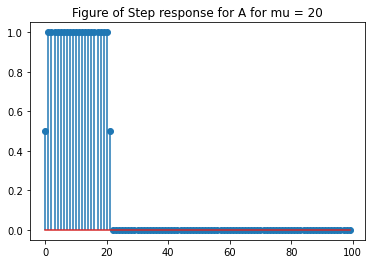

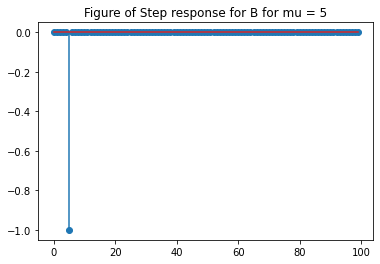

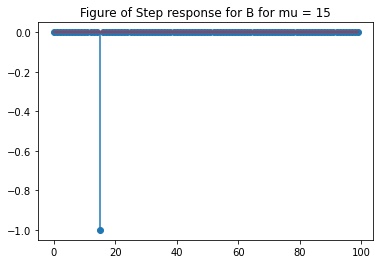

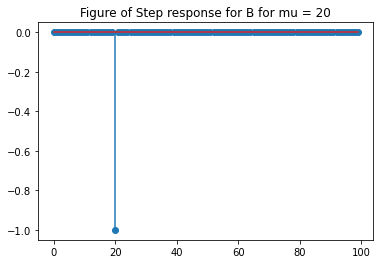

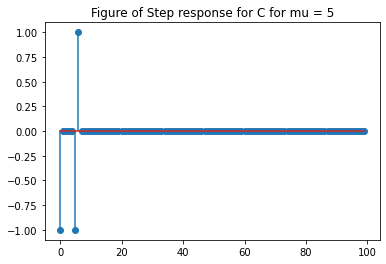

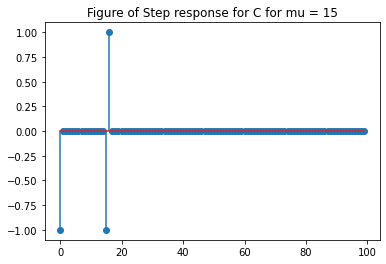

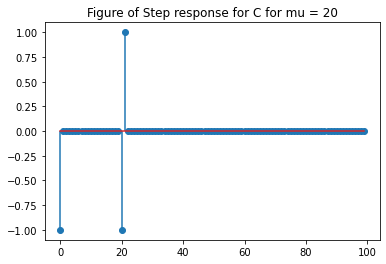

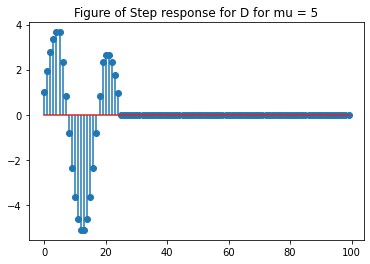

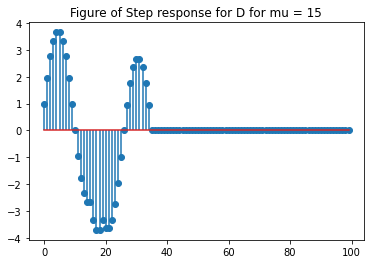

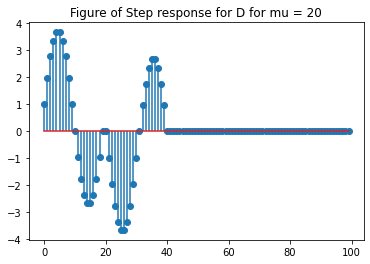

In [18]:
for index, system in enumerate("ABCD"):
    for m in mu:
        y_samples = np.sum(shift(systems[index], x_samples, m, impulse), axis=0)
        draw("Step", "{} for mu = {}".format(system, m), x_samples, y_samples)

As you can see, for step response of system A, as mu grows, the point that becomes $$\frac{1}{2}$$ for the second time, goes further,
So for $$mu = \infty$$, we will have the result as we calculated it above.
For step response of system B, as mu grows, the point that gets -1 goes further.
So for $$mu = \infty$$, we will have the result as we calculated it above.
For step response of system C, as mu grows, the points that get -1 and 1 go further.
So for $$mu = \infty$$, we will have the result as we calculated it above.
Finally, for step response of system D, as mu grows, the distance between two cos function increases,
So for $$mu = \infty$$, we will have the result as we calculated it above.